In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sns.set_style('darkgrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
forestfires = pd.read_csv("forestfires.csv")
forestfires.head()


month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [3]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
numerical_feature = forestfires.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'rain', 'area']


In [5]:
categorical_features = forestfires.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


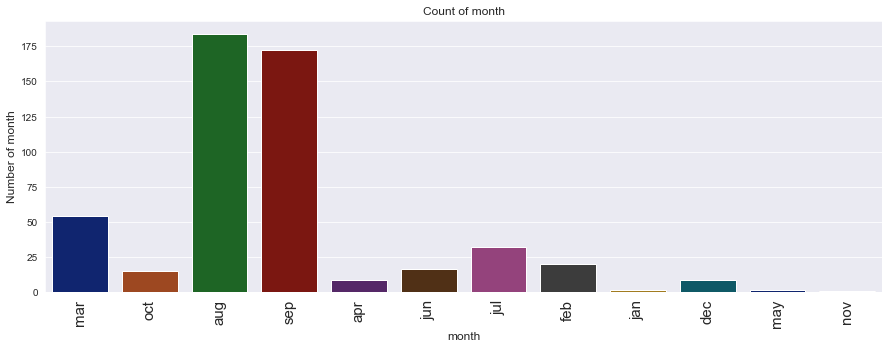

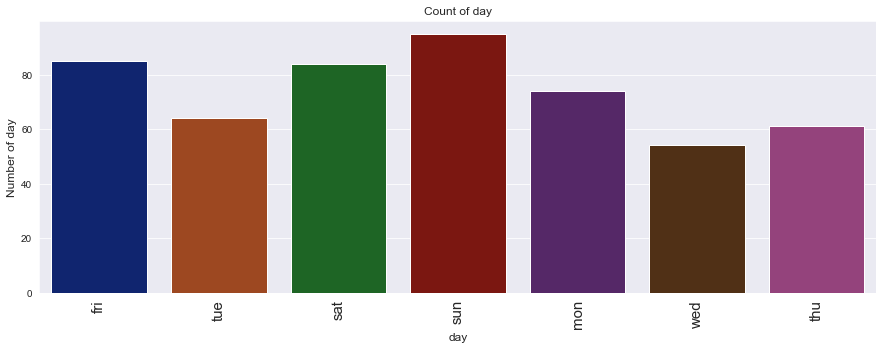

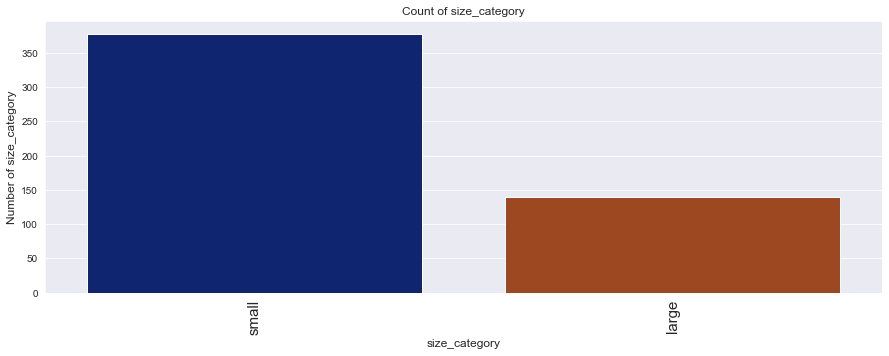

In [6]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    df = forestfires.copy()
    unique = df[column].value_counts(ascending=True);
    
    plt.title("Count of "+ column)
    sns.countplot(data=forestfires, x=column,palette = "dark")
    
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [7]:
type_ = ['small', 'large']
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=forestfires['size_category'].value_counts(), name="size_category"))

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Forestfires size category",
    annotations=[dict(text='size_category', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

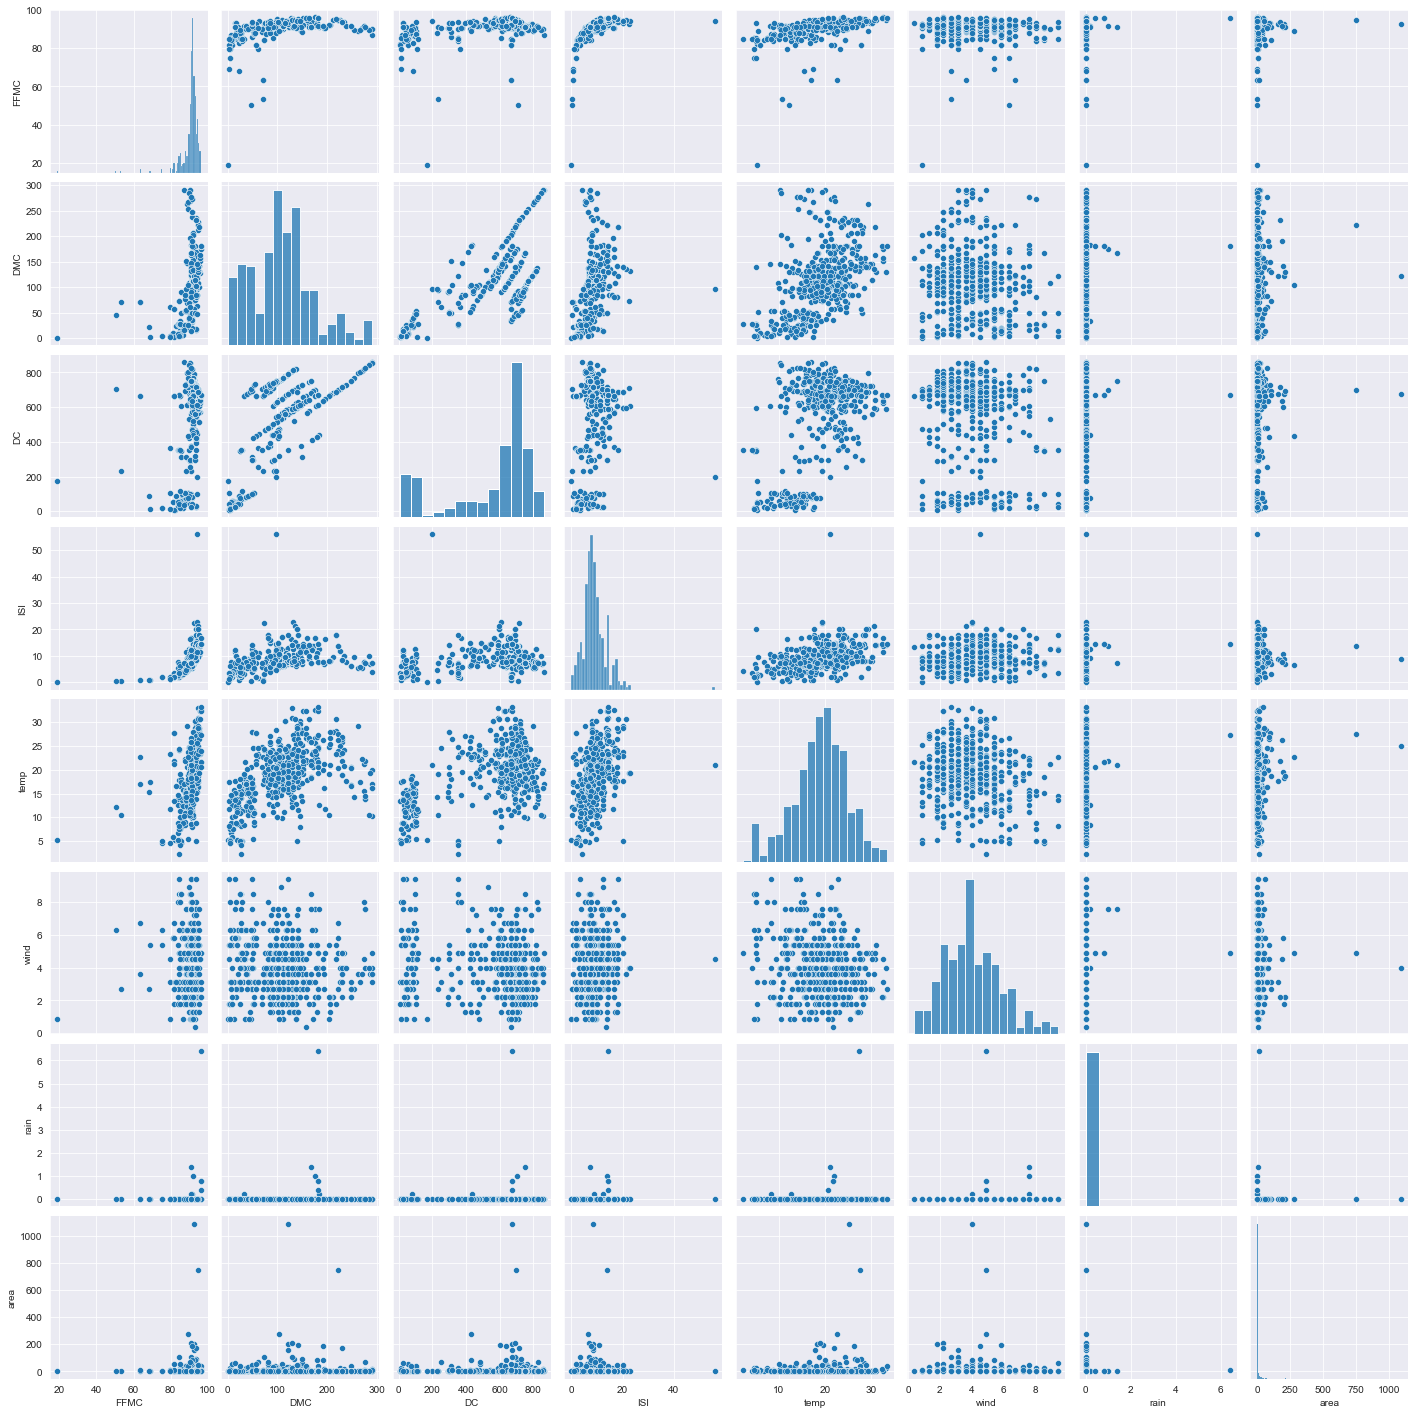

In [8]:
sns.set_style('darkgrid')
sns.pairplot(forestfires[numerical_feature])
plt.show()

In [9]:
forestfires['area_km'] = forestfires['area'] / 100

forestfires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthjan  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  area_km  
0          small      0.0  
1          small      0.0  
2          small      0.0  
3          small      0.0  
4          small      0.0  

[5 rows x 32 columns]

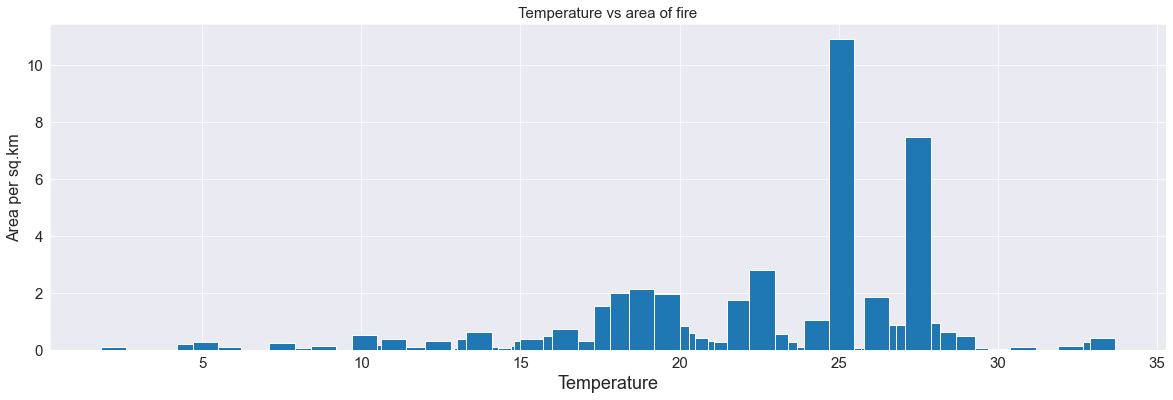

In [10]:
highest_fire_area = forestfires.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [12]:
forestfires.drop(["month","day"],axis=1,inplace = True)


In [39]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data_copy= forestfires.copy()
le = LabelEncoder()

le_count = 0
for col in data_copy.columns[1:]:
    if data_copy[col].dtype == 'object':
        if len(list(data_copy[col].unique())) <= 2:
            le.fit(data_copy[col])
            data_copy[col] = le.transform(data_copy[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [50]:
data_copy.size_category.unique()

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

Text(0.5, 1.0, 'Correlation with fire seze category \n')

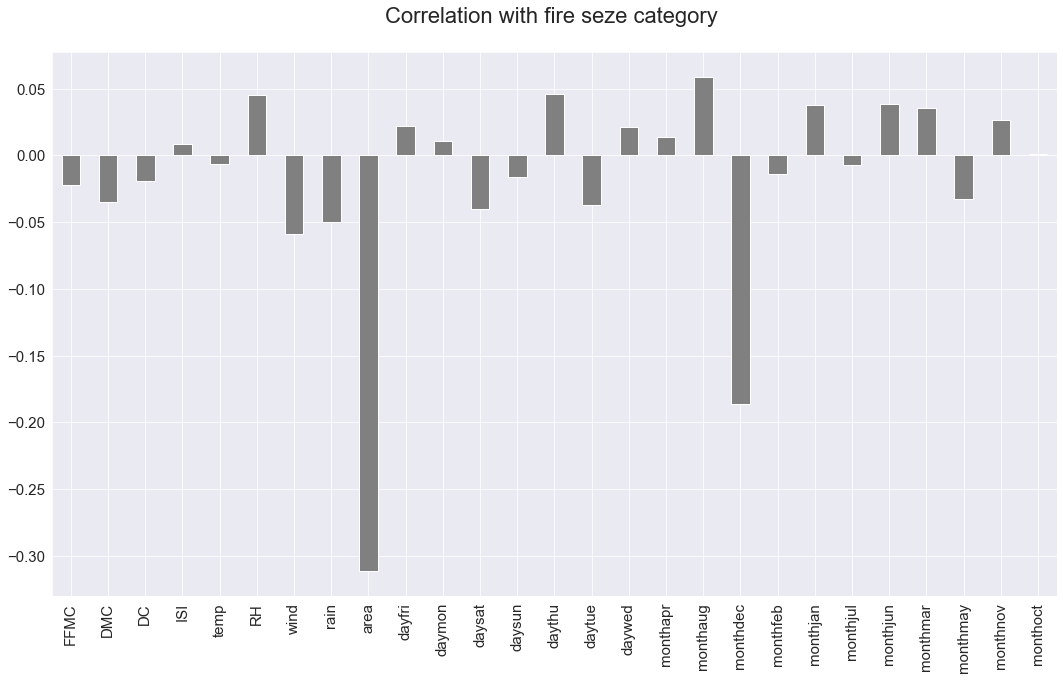

In [41]:

data2 = data_copy.iloc[:,:-3]

correlations = data2.corrwith(data_copy["size_category"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'grey',
        rot = 90, grid = True)
plt.title('Correlation with fire seze category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [43]:
forestfires_ = pd.read_csv("forestfires.csv")
forestfires_.iloc[:,:-20].head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

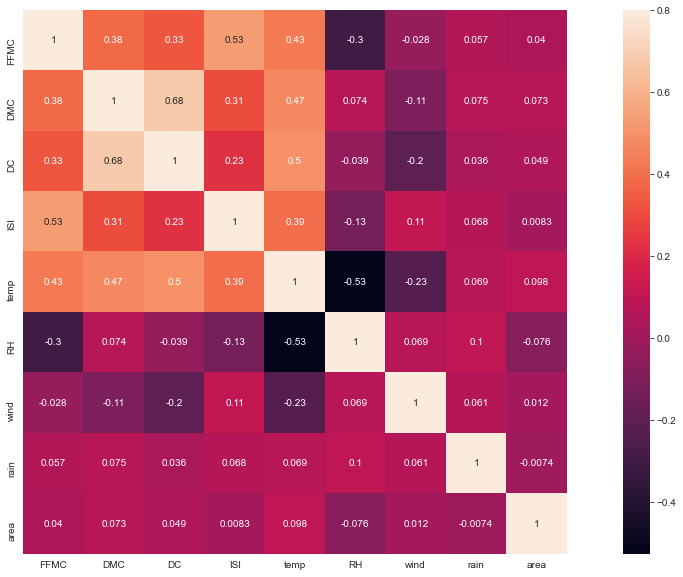

In [44]:
import seaborn as sns
import matplotlib.pyplot as pplt
corrmat = forestfires_.iloc[:,:-20].corr()
f, ax = pplt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [283]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from keras.optimizers import Adam


In [47]:
col = data2.columns
col

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct'],
      dtype='object')

In [232]:
"""def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)"""


X = data_copy.iloc[:,0:28]
y = data_copy.iloc[:,28]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,stratify = y)


In [93]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (361, 28)
Shape of X_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


In [ ]:
model = Sequential()
model.add(Dense(28, input_dim=28, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=500, batch_size=10)


Epoch 1/500
37/37 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.0000e+00
Epoch 2/500
37/37 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.0000e+00
Epoch 3/500
37/37 [==============================] - 0s 2ms/step - loss: -0.3392 - accuracy: 0.0000e+00
Epoch 4/500
37/37 [==============================] - 0s 2ms/step - loss: -0.7938 - accuracy: 0.0000e+00
Epoch 5/500
37/37 [==============================] - 0s 2ms/step - loss: -2.8655 - accuracy: 0.0000e+00
Epoch 6/500
37/37 [==============================] - 0s 2ms/step - loss: -5.2578 - accuracy: 0.0000e+00
Epoch 7/500
37/37 [==============================] - 0s 2ms/step - loss: -16.8567 - accuracy: 0.0000e+00
Epoch 8/500
37/37 [==============================] - 0s 2ms/step - loss: -62.0542 - accuracy: 0.0000e+00
Epoch 9/500
37/37 [==============================] - 0s 2ms/step - loss: -138.9226 - accuracy: 0.0000e+00
Epoch 10/500
37/37 [==============================] - 0s 2ms/s

37/37 [==============================] - 0s 2ms/step - loss: -10389150.8026 - accuracy: 0.0000e+00
Epoch 150/500
37/37 [==============================] - 0s 2ms/step - loss: -8809011.3964 - accuracy: 0.0000e+00
Epoch 151/500
37/37 [==============================] - 0s 2ms/step - loss: -12054897.5000 - accuracy: 0.0000e+00
Epoch 152/500
37/37 [==============================] - 0s 2ms/step - loss: -10827876.9605 - accuracy: 0.0000e+00
Epoch 153/500
37/37 [==============================] - 0s 2ms/step - loss: -11690504.1974 - accuracy: 0.0000e+00
Epoch 154/500
37/37 [==============================] - 0s 2ms/step - loss: -9647522.8026 - accuracy: 0.0000e+00
Epoch 155/500
37/37 [==============================] - 0s 2ms/step - loss: -9740837.2105 - accuracy: 0.0000e+00
Epoch 156/500
37/37 [==============================] - 0s 2ms/step - loss: -9655607.3289 - accuracy: 0.0000e+00
Epoch 157/500
37/37 [==============================] - 0s 2ms/step - loss: -16279915.2632 - accuracy: 0.0000e+00
E

37/37 [==============================] - 0s 2ms/step - loss: -85973341.2632 - accuracy: 0.0000e+00
Epoch 294/500
37/37 [==============================] - 0s 2ms/step - loss: -74378498.0000 - accuracy: 0.0000e+00
Epoch 295/500
37/37 [==============================] - 0s 2ms/step - loss: -71498422.9526 - accuracy: 0.0000e+00
Epoch 296/500
37/37 [==============================] - 0s 2ms/step - loss: -87388014.5263 - accuracy: 0.0000e+00
Epoch 297/500
37/37 [==============================] - 0s 2ms/step - loss: -83248040.5263 - accuracy: 0.0000e+00
Epoch 298/500
37/37 [==============================] - 0s 2ms/step - loss: -77841379.3684 - accuracy: 0.0000e+00
Epoch 299/500
37/37 [==============================] - 0s 2ms/step - loss: -89626649.8947 - accuracy: 0.0000e+00
Epoch 300/500
37/37 [==============================] - 0s 2ms/step - loss: -121456861.4737 - accuracy: 0.0000e+00
Epoch 301/500
37/37 [==============================] - 0s 2ms/step - loss: -100262646.1053 - accuracy: 0.0000

Epoch 437/500
37/37 [==============================] - 0s 2ms/step - loss: -249871389.7697 - accuracy: 0.0000e+00
Epoch 438/500
37/37 [==============================] - 0s 2ms/step - loss: -170666593.6974 - accuracy: 0.0000e+00
Epoch 439/500
37/37 [==============================] - 0s 2ms/step - loss: -238334505.8947 - accuracy: 0.0000e+00
Epoch 440/500
37/37 [==============================] - 0s 2ms/step - loss: -278234164.2105 - accuracy: 0.0000e+00
Epoch 441/500
37/37 [==============================] - 0s 2ms/step - loss: -274261895.2632 - accuracy: 0.0000e+00
Epoch 442/500
37/37 [==============================] - 0s 2ms/step - loss: -306762835.3684 - accuracy: 0.0000e+00
Epoch 443/500
37/37 [==============================] - 0s 2ms/step - loss: -227553460.0000 - accuracy: 0.0000e+00
Epoch 444/500
37/37 [==============================] - 0s 2ms/step - loss: -259556388.6316 - accuracy: 0.0000e+00
Epoch 445/500
37/37 [==============================] - 0s 2ms/step - loss: -280834397.89

In [145]:
def base_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  
  
model_ = base_model([28,50,50,1])
model_.fit(np.array(X_train),np.array(y_train),epochs=380)
pred_train = model_.predict(np.array(X_train))


Epoch 1/380
12/12 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.6993
Epoch 2/380
12/12 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7287
Epoch 3/380
12/12 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7408
Epoch 4/380
12/12 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.7635
Epoch 5/380
12/12 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7242
Epoch 6/380
12/12 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.7309
Epoch 7/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7329
Epoch 8/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7576
Epoch 9/380
12/12 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7750
Epoch 10/380
12/12 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7704
Epoch 11/

12/12 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9946
Epoch 84/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 85/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 86/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9985
Epoch 87/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9917
Epoch 88/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 89/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9985
Epoch 90/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 91/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 92/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 93/380


Epoch 242/380
12/12 [==============================] - 0s 1ms/step - loss: 7.9054e-05 - accuracy: 1.0000
Epoch 243/380
12/12 [==============================] - 0s 1ms/step - loss: 6.0905e-05 - accuracy: 1.0000
Epoch 244/380
12/12 [==============================] - 0s 1ms/step - loss: 7.8791e-05 - accuracy: 1.0000
Epoch 245/380
12/12 [==============================] - 0s 1ms/step - loss: 8.7597e-05 - accuracy: 1.0000
Epoch 246/380
12/12 [==============================] - 0s 1ms/step - loss: 1.3031e-04 - accuracy: 1.0000
Epoch 247/380
12/12 [==============================] - 0s 1ms/step - loss: 2.0637e-04 - accuracy: 1.0000
Epoch 248/380
12/12 [==============================] - 0s 1ms/step - loss: 7.4121e-04 - accuracy: 0.9991
Epoch 249/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9985
Epoch 250/380
12/12 [==============================] - 0s 1ms/step - loss: 4.2343e-05 - accuracy: 1.0000
Epoch 251/380
12/12 [==============================] - 0s 1

12/12 [==============================] - 0s 1ms/step - loss: 1.1882e-05 - accuracy: 1.0000
Epoch 321/380
12/12 [==============================] - 0s 2ms/step - loss: 1.4215e-05 - accuracy: 1.0000
Epoch 322/380
12/12 [==============================] - 0s 1ms/step - loss: 9.7000e-06 - accuracy: 1.0000
Epoch 323/380
12/12 [==============================] - 0s 1ms/step - loss: 5.4568e-06 - accuracy: 1.0000
Epoch 324/380
12/12 [==============================] - 0s 1ms/step - loss: 2.1190e-05 - accuracy: 1.0000
Epoch 325/380
12/12 [==============================] - 0s 1ms/step - loss: 6.6437e-04 - accuracy: 1.0000
Epoch 326/380
12/12 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9947
Epoch 327/380
12/12 [==============================] - 0s 1ms/step - loss: 1.0048e-05 - accuracy: 1.0000
Epoch 328/380
12/12 [==============================] - 0s 2ms/step - loss: 6.4337e-06 - accuracy: 1.0000
Epoch 329/380
12/12 [==============================] - 0s 2ms/step - loss

In [288]:
model_.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_97 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 51        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

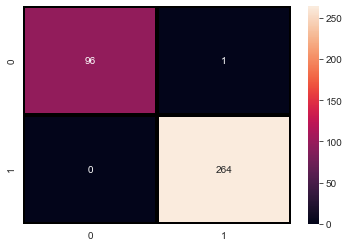

In [146]:
pred_test = model_.predict(np.array(X_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_train_ = pd.Series([i[0] for i in pred_train])

pred_y = []
pred_x = []
for i in pred_test:
    if i>0.5:
        pred_y.append(1)
    else:
        pred_y.append(0)
        
for i in pred_train_:
    if i>0.5:
        pred_x.append(1)
    else:
        pred_x.append(0)
        
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, pred_x),annot=True,fmt = "d",linecolor="k",linewidths=3)




In [147]:
scores = model_.evaluate(X_test, y_test)
print((model_.metrics_names[1]))

5/5 [==============================] - 0s 2ms/step - loss: 1.9707 - accuracy: 0.9231
accuracy


<AxesSubplot:>

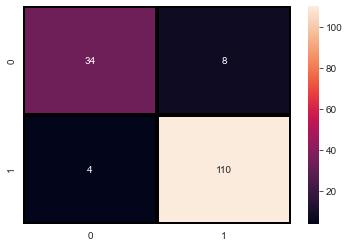

In [148]:
sns.heatmap(confusion_matrix(y_test, pred_y),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [229]:
def base_model2(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="uniform",activation="sigmoid"))
    adam=Adam(learning_rate=0.01)
    model.compile(loss="binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])
    return model  
   
"""model_2 = base_model2([28,50,50,1])
model_2.fit(np.array(X_train),np.array(y_train),epochs=380)
pred_train = model_2.predict(np.array(X_train))
    """
k_model = KerasClassifier(build_fn=lambda:base_model2([28,50,50,1]), verbose=0)



In [ ]:
batch_size = [10,20,40]
epochs = [10,50,100,500,700,1000]

param_grid = dict(batch_size = batch_size,epochs = epochs)

Grid = GridSearchCV(estimator = k_model,param_grid = param_grid,cv = 10)
grid_result = Grid.fit(X_train,y_train)


In [207]:

print('Best result : {}, Using parameters{}'.format(grid_result.best_score_,grid_result.best_params_))

stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
means = grid_result.cv_results_['mean_test_score']


for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best result : 0.9168949842453002, Using parameters{'batch_size': 20, 'epochs': 1000}
0.7838280081748963,0.03734608655221178 with: {'batch_size': 10, 'epochs': 10}
0.8752283096313477,0.02812187737273547 with: {'batch_size': 10, 'epochs': 50}
0.8835996985435486,0.024434864498214096 with: {'batch_size': 10, 'epochs': 100}
0.9057838797569275,0.010644568817571922 with: {'batch_size': 10, 'epochs': 500}
0.889193308353424,0.015226699279636447 with: {'batch_size': 10, 'epochs': 700}
0.9057838797569275,0.013800993178941281 with: {'batch_size': 10, 'epochs': 1000}
0.7422754883766174,0.025137099116127395 with: {'batch_size': 20, 'epochs': 10}
0.8530821800231934,0.019424074268920264 with: {'batch_size': 20, 'epochs': 50}
0.8696727514266968,0.032728501410022016 with: {'batch_size': 20, 'epochs': 100}
0.8947108149528503,0.02267119084256414 with: {'batch_size': 20, 'epochs': 500}
0.905821931362152,0.022195306695884435 with: {'batch_size': 20, 'epochs': 700}
0.9168949842453002,0.02152140603359116 with

In [278]:
data = pd.read_csv("forestfires.csv")
data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],axis=1,inplace = True)

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()


month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [279]:
data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


scaled_features=scaler.fit_transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head


month       day      FFMC       DMC        DC       ISI      temp  \
0   -1.968443  0.357721 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1    1.110120 -1.090909 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2    1.110120  0.840597 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3   -1.968443  0.357721  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4   -1.968443  1.323474 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  1.536084   
513  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.519019   
514  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.398350   
515  0.230531  0.840597  0.680957  0.549003  0.269382  0.500176  1.156839   
516  1.549915 -1.090909 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058   

           RH      wind      rain      area  
0    0.411724  1.498614 -0.073268 -0.202020  
1   -0.692456 -1.741756 -0.073268 -0.202020  
2   -0.692456 -1.518282 -0.073268 -0.202020  
3    3.233519 -0.009834  0.603155 -0.202020  
4    3.356206 -1.238940 -0.073268 -0.202020  
..        ...       ...       ...       ...  
512 -0.753800 -0.736124 -0.073268 -0.100753  
513  1.638592  0.995798 -0.073268  0.651674  
514  1.577248  1.498614 -0.073268 -0.026532  
515 -0.140366 -0.009834 -0.073268 -0.202020  
516 -0.815143  0.269509 -0.073268 -0.202020  

[517 rows x 11 columns]

In [280]:
x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [281]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   size_category  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
"""def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam=Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))"""


In [286]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9944444417953491, using {'activation_function': 'tanh', 'batch_size': 40, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}


In [354]:
final_model.get_params()

{'verbose': 0,
 'activation_function': 'tanh',
 'batch_size': 40,
 'dropout_rate': 0.1,
 'epochs': 100,
 'init': 'normal',
 'learning_rate': 0.01,
 'neuron1': 8,
 'neuron2': 2,
 'build_fn': <function __main__.create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2)>}

In [330]:
def create_model_final(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam=Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [347]:
model_final = create_model_final(0.01,0.1,"tanh", "normal", 8,2)


model_final.fit(np.array(x_train),np.array(y_train),epochs=100)
pred_train = model_final.predict(np.array(x_train))


Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6717 - accuracy: 0.6607
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7683
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7489
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8092
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8384
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8403
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8750
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8913
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9053
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9256
Epoch 11/

12/12 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9803
Epoch 84/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9909
Epoch 85/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9814
Epoch 86/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9632
Epoch 87/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9758
Epoch 88/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9814
Epoch 89/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9915
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9813
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9832
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9908
Epoch 93/100


In [348]:
scores_ = model_final.evaluate(x_test, y_test)
print((model_final.metrics_names[1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9744
accuracy


<AxesSubplot:>

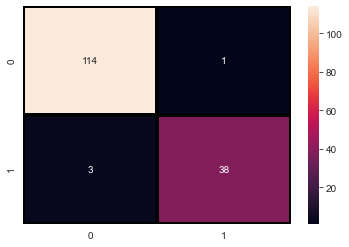

In [349]:
pred_final = model_final.predict(x_test)

pred_final = pd.Series([i[0] for i in pred_final])


pred_NN = []

        
for i in pred_final:
    if i>0.5:
        pred_NN.append(1)
    else:
        pred_NN.append(0)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred_NN),annot=True,fmt = "d",linecolor="k",linewidths=3)



In [350]:
from sklearn.metrics import  accuracy_score
accuracy_final = accuracy_score(y_test,pred_NN)
accuracy_final

0.9743589743589743

In [351]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils


def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

make_keras_picklable()

In [352]:
import pickle
with open('model_forestfires_nn.pkl', 'wb') as file:
      pickle.dump(model_final, file)

In [353]:
filename = "model_forestfires_nn.pkl"
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(x_test, y_test)
print(result)

5/5 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9780
[0.0719185322523117, 0.9743589758872986]
